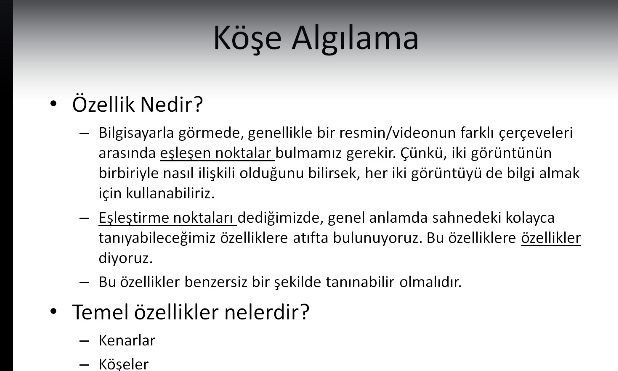

In [2]:

cv2

<module 'cv2' from 'C:\\Users\\APO\\AppData\\Roaming\\Python\\Python38\\site-packages\\cv2\\__init__.py'>

In [15]:
import matplotlib.pyplot as plt


In [5]:
import numpy as np

In [6]:
# resmi içeri aktar

In [9]:
img = cv2.imread("sudoku.png",0)

In [10]:
img = np.float32(img) 

In [13]:
img.shape

(225, 225)

In [19]:
plt.figure(), plt.imshow(img,cmap = "gray");

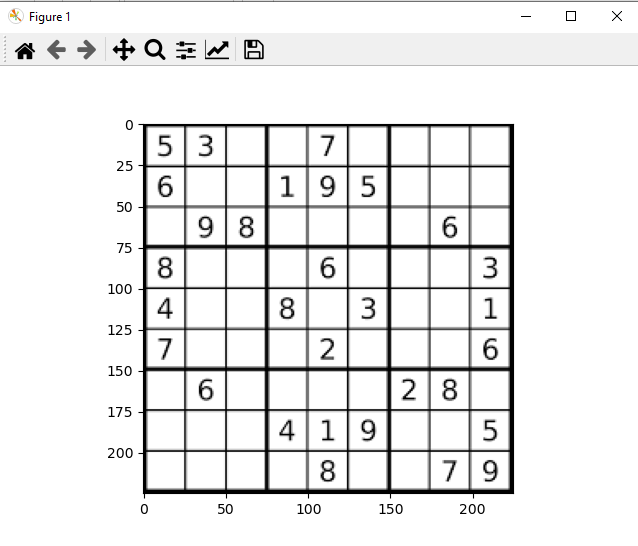

In [20]:
# köşeleri tespit etme ( harris corner detection)

In [21]:
dst = cv2.cornerHarris(img,
                        blockSize = 2 , # kaç komsunua bakacagız
                         ksize = 3 ,     # kutucugun boyutu
                           k = 0.04)     # harris parametre

In [22]:
plt.figure(), plt.imshow(dst,cmap = "gray");

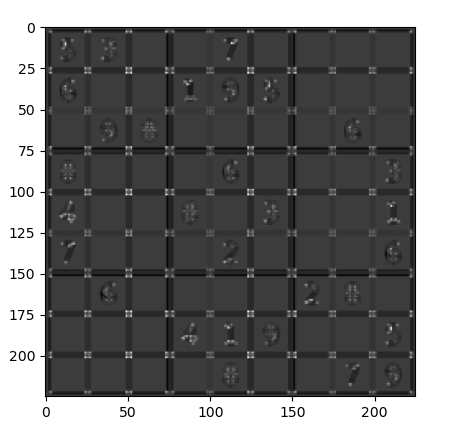

karelerin tam köşe noktalarında işaretler var ancak tam belirgin değil 

In [23]:
dst = cv2.dilate(dst, None) # genişletme 

In [25]:
img[dst>0.2*dst.max()] = 1 # boyutları 1  yaparak köşeleri daha belirgin hale getirdim

In [26]:
plt.figure(), plt.imshow(dst,cmap = "gray");

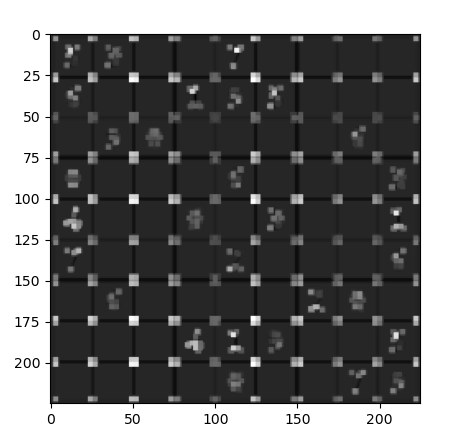

2 . yöntem

In [9]:
img = cv2.imread("sudoku.png",0)

In [10]:
img = np.float32(img) 

In [42]:
corners = cv2.goodFeaturesToTrack(img, 
                                  120,  # toplamda kaç köşe istedğimi belirtiyorum
                                  0.01, # qualityLevel
                                  10)   # minimum mesafe 2 köşe arasındaki
# featurelarıımı daha belirgin hale ggetirmek için 

In [43]:
corners.dtype # bunu integer'a cevireceğim

dtype('float32')

In [44]:
corners = np.int64(corners)

In [45]:
corners.dtype

dtype('int64')

In [46]:
for i in corners : 
    x,y = i.ravel() # düzleştriyorum 
    cv2.circle(img,(x,y),3,(125,125,125),cv2.FILLED) # köşelere daire çiz ve cv2.filled ile içini doldur 

In [47]:
plt.imshow(img)
plt.axis("off")

(-0.5, 224.5, 224.5, -0.5)

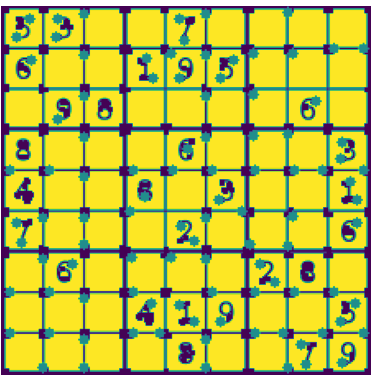

9x9 birim bir matrisim var ve toplamda 100 köşe noktam var 

ben 27. satırda 100 köşe isteğim için bazılarını kaçırmış ve hatta sayıların köşelerini almış yani kaçırmış 

bunu 120 yaparak tekrar deniyorum

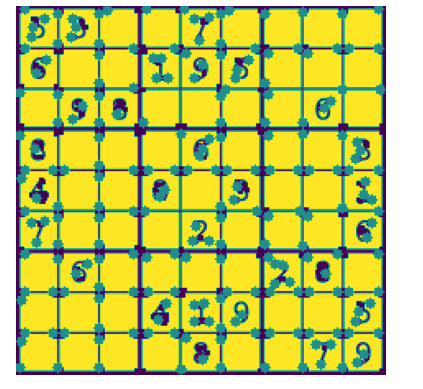

evet burada köşeleri daha iyi yakaladıgını görebiliriz